# Part II - (Is it Worth it to Invest in a Prosper Loan: Key Insights to Know)
## by (Jennifer Chinenye Umoke)


## Investigation Overview


> The key aim for any lender is to receive his principal invested and additional earnings as interest. In this presentation, I will be going through the key things a would-be investor in a Prosper loan needs to be aware of. This analysis is based on over 100,000 loans listed on the crowd-lending site from 2005 - 2014. For my key insights I focused on the relationship between occupation, income and loan status. Generally, borrowers with a higher debt-to-income ratio were more likely to default on their loans. Students were the most deliquent low income borrowers while entrepreneurs were the most common high income borrowers. I also found it interesting that the lowest APRs were being given for loans whose uses were not provided, which I think might have a negative effect on profitability of the loans for investors. Finally, debt consolidation being the most common loan use showed a high level of indebtedness among borrowers. 

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> As earlier stated, the dataset contains over 100k loans listed on Prosper between 2005 - 2014. It has 81 datapoints covering information about the loans, borrowers and investors. However, I focus on the variables relating to loans and borrower characteristics in my analysis. 

In [119]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [120]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

# create a copy dataset with variables of interest
ld_small = loan_data[['LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)',
'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'IncomeVerifiable', 
'LoanOriginalAmount', 'TotalTrades']]




In [121]:
# rename listing category
ld_small.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace=True )


In [122]:
# change the values of ListingCategory into categories listed in the data dictionary
categories = np.arange(0, 21)
listings = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 
'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']

ld_small['ListingCategory'].replace(to_replace=categories, value=listings, inplace=True)

In [123]:
# dropping income outliers

ld_small = ld_small.query('StatedMonthlyIncome > 500')

In [124]:
ld_small = ld_small.query('StatedMonthlyIncome <= 50000')

In [125]:
ld_small = ld_small.query('StatedMonthlyIncome < 1750002')

## Distribution of Loan Uses

From this slide, we can see that the most common use of loans is debt consolidation. Debt consolidation is a form of refinancing where a borrower takes out a new loan to pay off existing ones. This already indicates a high level of indebtedness among Prosper borrowers. In my exploratory steps, this was confirmed by an average of 20 tradelines per customer.


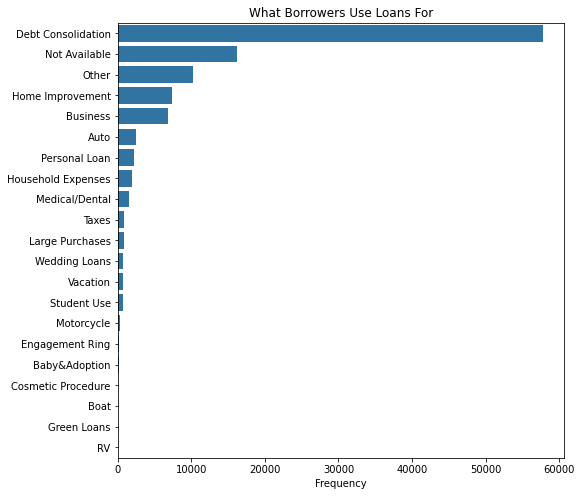

In [127]:
# distribution of loan uses
plt.figure(figsize=[8, 8])
default_color = sns.color_palette()[0]
ax = sns.countplot(data = ld_small, y = 'ListingCategory', color = default_color,
order = ld_small['ListingCategory'].value_counts().index)
ax.set(ylabel=None)
ax.set(xlabel='Frequency')
plt.title('What Borrowers Use Loans For')


plt.show()

## Rate of APR by Loan Uses

From the violin plot, the APR of 51% was for  a loan whose use was not stated although the median APR is just shy of 20%. This is not good for creditors as their lowest APRs are being given for unstated uses
Household expenses and cosmetic procedure had the highest median APRs while personal had the lowest median APR. 
Household expenses and cosmetic procedures are arguably riskier uses of money as they do not generally bring a return. 


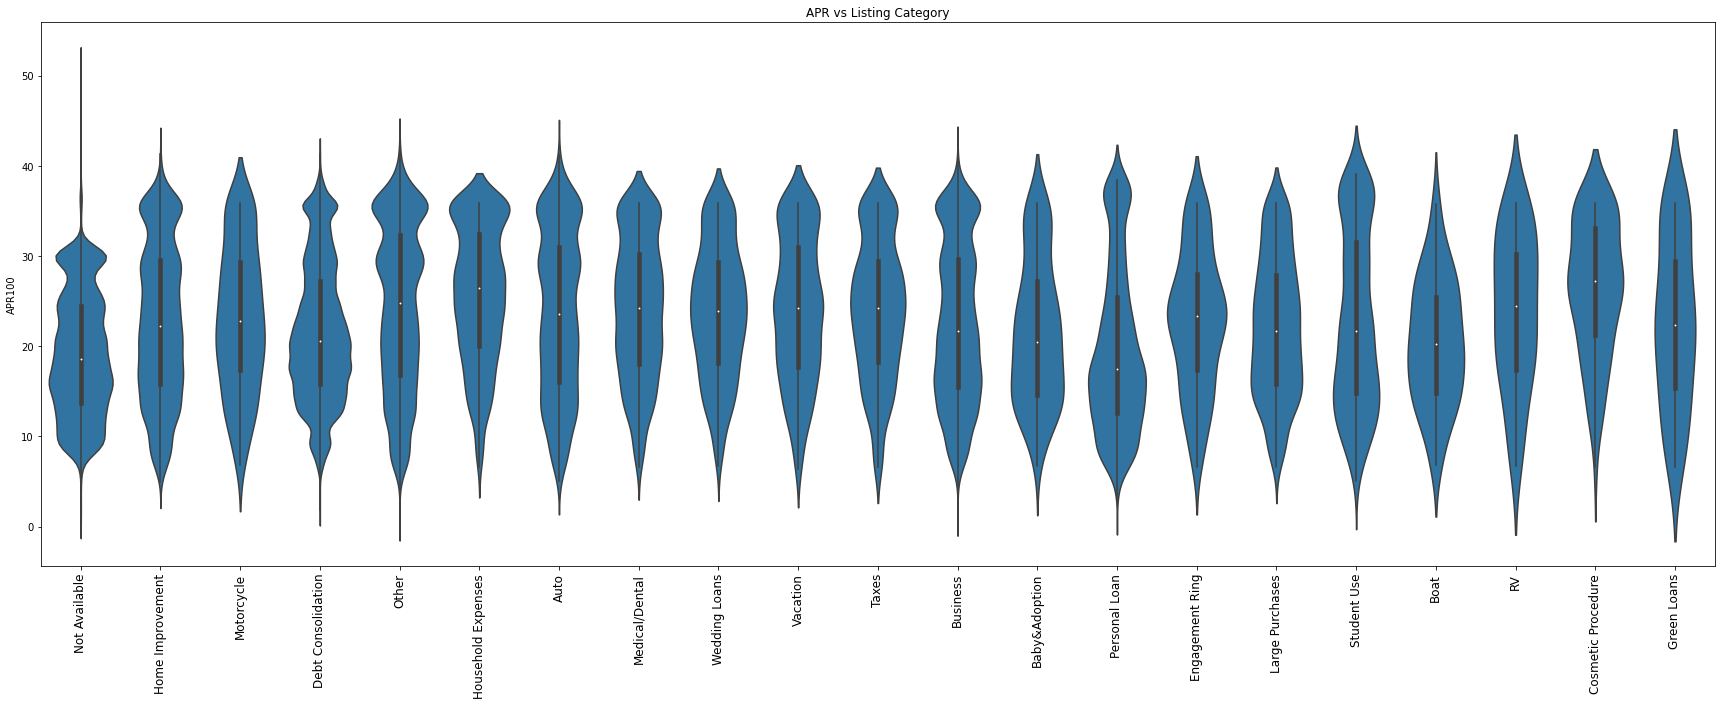

In [161]:
ld_small['APR100'] = ld_small.BorrowerAPR.apply(lambda x : x * 100)
color = sns.color_palette()[0]
plt.figure(figsize=[30, 10])
ax = sns.violinplot(data=ld_small, y='APR100', x='ListingCategory', color=color)
plt.title('APR vs Listing Category or Loan Use')
ax.set(xlabel=None)
plt.xticks(rotation=90, fontsize=12)

plt.show()

## Distribution of Monthly Income
Most of the income values are clustered between 500 dollars to 10,000 dollars but there are also peaks around the 20k and 50k mark. 


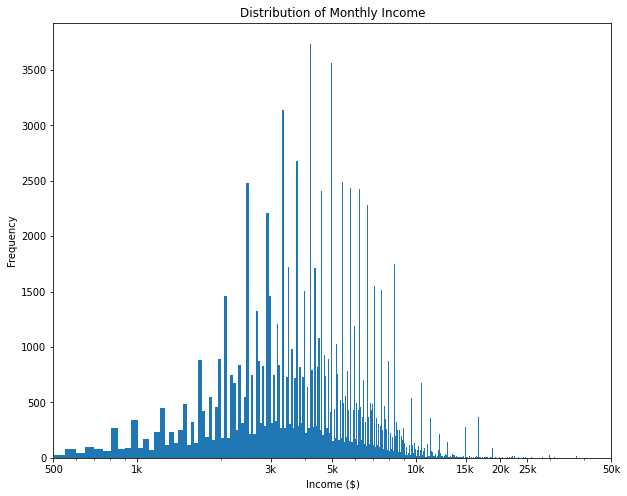

In [129]:
# distribution of monthly income
binsize = 50
bins = np.arange(ld_small.StatedMonthlyIncome.min(), ld_small.StatedMonthlyIncome.max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xticks([500, 1e3, 3e3, 5e3, 10e3, 15e3, 20e3, 25e3, 50e3], ['500', '1k', '3k', '5k', '10k', '15k', '20k', '25k', '50k'])
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.xlim([500, 50000])
plt.show()

## Distribution of Loan Original Amount
Loans size ranges from 1,000 dollars to 35,000 dollars and there aren't much high outliers compared to income. This indicates that a lot of borrowers are borrowing far more than their income, a further indication of high debt-to-income ratio. 

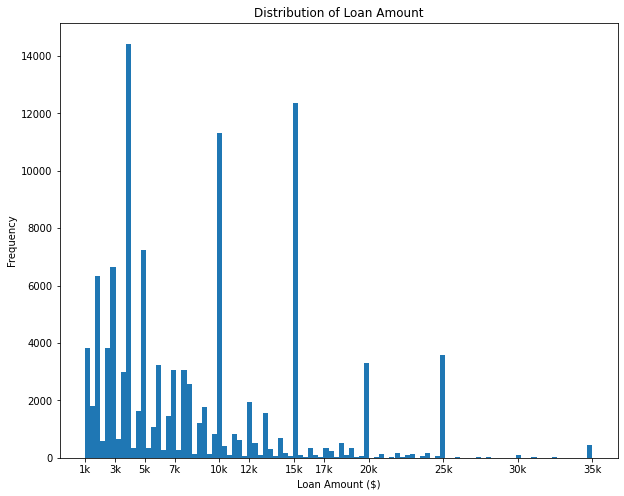

In [130]:
ticks = [1e3, 3e3, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3]
ticks_label = [str(int(v/1000))+'k' for v in ticks]


plt.figure(figsize=[10, 8])
binsize = 100
ticks = [1e3, 3e3, 5e3, 7e3, 10e3, 12e3, 15e3, 17e3, 20e3, 25e3, 30e3, 35e3]
labels = [str(int(v/1000))+'k' for v in ticks]
bins = np.arange(ld_small.LoanOriginalAmount.min(), ld_small.LoanOriginalAmount.max()+binsize, binsize)
plt.hist(data=ld_small, x='LoanOriginalAmount', bins=binsize)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.xticks(ticks=ticks, labels=labels)
plt.show()

For the last set of visualisations, I will be analysing the relationship between income, occupation and loan status in order to identify the best and worst borrowers by repayment and/or deliquency rate. 

In [131]:
#grouping occupations by mean monthly income in order to retrieve the top 10 income classes with the highest and lowest monthly incomes
grouped_occupations = ld_small.groupby(by = 'Occupation')['StatedMonthlyIncome'].mean().round(2)
grouped_occupations = grouped_occupations.sort_values(ascending=False)
highest_earning_occupations = grouped_occupations[:10]
lowest_earning_occupations = grouped_occupations[-10:]

lowest_earning_occupations

Occupation
Nurse's Aide                          2799.97
Waiter/Waitress                       2574.70
Student - College Graduate Student    2275.64
Teacher's Aide                        2267.80
Student - College Freshman            1966.42
Student - Community College           1873.97
Student - College Junior              1697.88
Student - College Senior              1668.17
Student - Technical School            1558.76
Student - College Sophomore           1320.66
Name: StatedMonthlyIncome, dtype: float64

In [132]:
top10_Occupations_List = highest_earning_occupations.index.to_list()


# retrieving list of lowest earning occupations
bottom10_Occupations_List = lowest_earning_occupations.index.to_list()


In [133]:
top10_data = ld_small[ld_small['Occupation'].isin(top10_Occupations_List)]


In [134]:
bottom10_data = ld_small[ld_small['Occupation'].isin(bottom10_Occupations_List)]

# Top 10 Occupations by Mean Monthly Income vs Repayment/Deliquency Rate
Judges are the best borrowers with little deliquency rates. Executives had the highest income followed by doctors while investors had the longest deliquent periods (above 120 days).

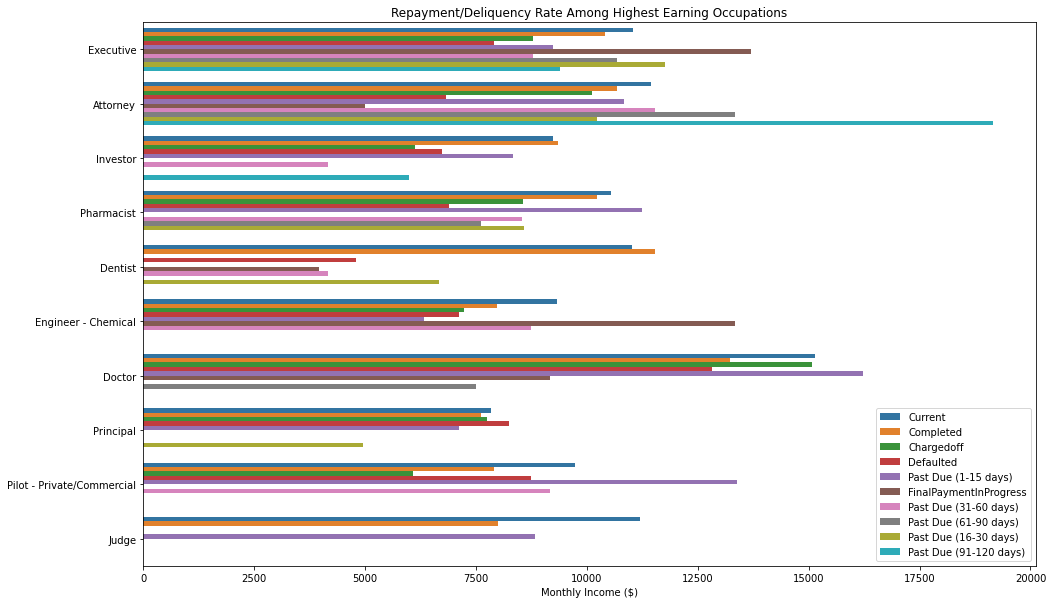

In [158]:
# top 10 occupation by monthly income against loan status

fig = plt.figure(figsize = [16,10])
ax = sns.barplot(data = top10_data, y = 'Occupation', x = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'tab10', ci=None)
plt.title('Repayment/Deliquency Rate Among Highest Earning Occupations')
ax.set(ylabel=None, xlabel='Monthly Income ($)')
plt.legend(loc='lower right')
plt.show();

# Bottom 10 Occupations by Mean Monthly Income vs Repayment/Deliquency Rate
Among the lower income earners, graduate students have the best repayment rate. There is generally a higher rate of deliquency among lower income earners as the rate of deliquency is higher than the rate of full repayment for most lower income earners. 


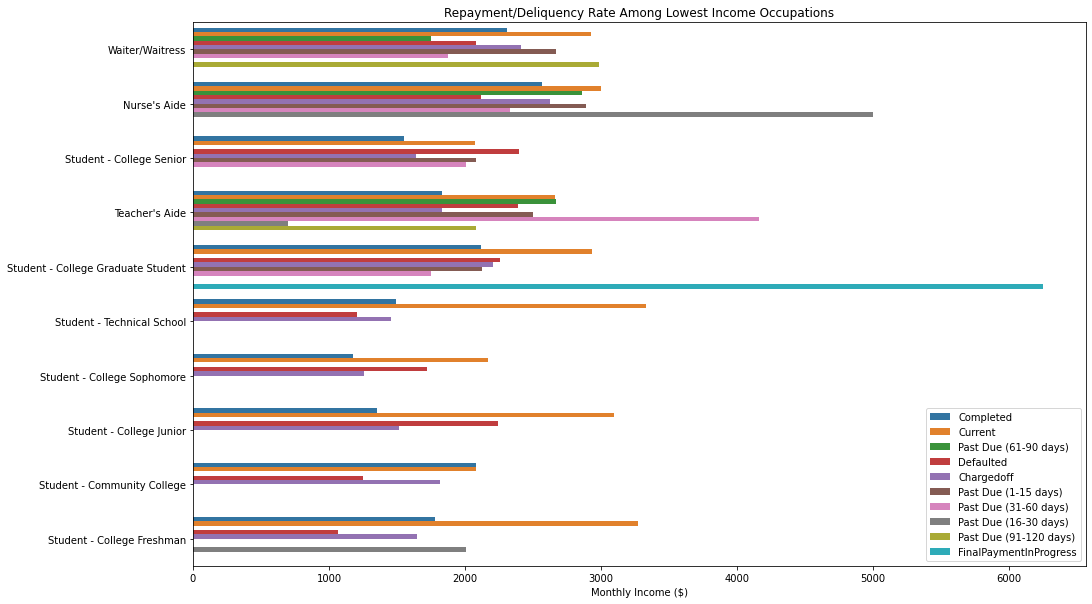

In [137]:
# bottom 10 occupations by monthly income against loan status
fig = plt.figure(figsize = [16,10])
ax = sns.barplot(data = bottom10_data, y = 'Occupation', x = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'tab10', ci=None)
ax.set(ylabel=None, xlabel='Monthly Income ($)')
plt.title('Repayment/Deliquency Rate Among Lowest Income Occupations')
plt.legend(loc='lower right')
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [4]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_notebook>.ipynb --to slides --post serve --no-input --no-prompt

zsh:1: no such file or directory: Part_II_notebook


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
